In [1]:
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Путь к главной папке с данными
main_folder_path = "D:\\diplom_baza\\baza_copy"

# Список классов (названия папок)
classes = os.listdir(main_folder_path)

# Инициализация списка для изображений и соответствующих им классов
X = []
y = []

# Загрузка изображений и их меток
for class_name in classes:
    class_path = os.path.join(main_folder_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Проверка, успешно ли загружено изображение
        try:
            image = cv2.imread(image_path)
            if image is not None and not image.size == 0:
                image = cv2.resize(image, (256, 256))
                X.append(image)
                y.append(class_name)
        except Exception as e:
            print(f"Error processing image {image_path}: {str(e)}")

# Преобразование в массивы numpy
X = np.array(X)
y = np.array(y)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Разделение изначальных данных на обучающую и тестовую выборки
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_encoded, test_size=0.1, random_state=42)

# Разделение обучающей выборки на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

In [2]:
import tensorflow as tf
# Преобразование тензоров в списки/массивы
y_train = y_train.numpy() if isinstance(y_train, tf.Tensor) else y_train
y_val = y_val.numpy() if isinstance(y_val, tf.Tensor) else y_val

# Изменение типа данных
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

# Использование массивов NumPy
X_train = np.array(X_train)
X_val = np.array(X_val)

In [3]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (5360, 256, 256, 3)
y_train: (5360,)
X_val: (596, 256, 256, 3)
y_val: (596,)
X_test: (662, 256, 256, 3)
y_test: (662,)


In [4]:
unique_classes = np.unique(y)

# Выведем список уникальных классов
print("Уникальные классы:", unique_classes)

Уникальные классы: ['aronnik' 'barbaris' 'belladonna' 'belokrilnik' 'beresklet' 'biryuchina'
 'boyaroshnik' 'brusnika' 'buzina' 'buzina_yad' 'cheremuha' 'chernika'
 'ezevika' 'fitolakka' 'gimolost' 'gimolost_les' 'godgi' 'golubika' 'irga'
 'kalina' 'klukva' 'kostyanika' 'krizovnik' 'krushina' 'kupena' 'landish'
 'magonia' 'malina' 'mogevelnik' 'moroshka' 'oblepiha' 'paslen_chern'
 'paslen_slad' 'ryabina' 'ryabina_cherno' 'shelkovica' 'shipovnik'
 'smorodina' 'snegno' 'tis' 'vinograd_dev' 'vishnya' 'volche_liko'
 'voronec' 'voroniy_glaz' 'zemlenika']


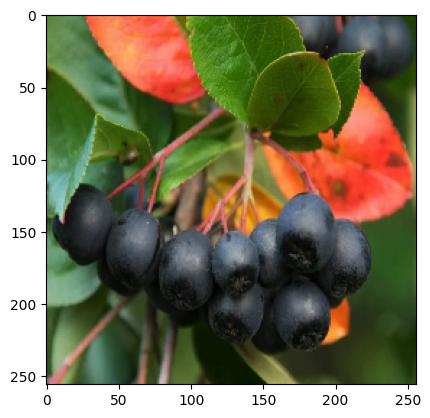

In [5]:
import matplotlib.pyplot as plt
index = 4966
plt.imshow(cv2.cvtColor(X[index], cv2.COLOR_BGR2RGB))

In [6]:
import autokeras as ak

# Инициализация классификатора AutoKeras
clf = ak.ImageClassifier(
    max_trials=3,
    objective='val_accuracy',
    directory='berries2',
    overwrite=True)

clf.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Using TensorFlow backend

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
vanilla           |vanilla           |image_block_1/block_type
True              |True              |image_block_1/normalize
False             |False             |image_block_1/augment
3                 |3                 |image_block_1/conv_block_1/kernel_size
1                 |1                 |image_block_1/conv_block_1/num_blocks
2                 |2                 |image_block_1/conv_block_1/num_layers
True              |True              |image_block_1/conv_block_1/max_pooling
False             |False             |image_block_1/conv_block_1/separable
0.25              |0.25              |image_block_1/conv_block_1/dropout
32                |32                |image_block_1/conv_block_1/filters_0_0
64                |64                |image_block_1/conv_block_1/filters_0_1
flatten           |flatten           |classification_head_1/spatial_reduction_1/reduction_type
0.5    

In [8]:
best_model = clf.export_model()
# Получите архитектуру модели в виде JSON строки
model_json = best_model.to_json()

print("Model architecture:")
print(model_json)

Model architecture:
{"class_name": "Functional", "config": {"name": "model", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 256, 256, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_1"}, "name": "input_1", "inbound_nodes": []}, {"class_name": "Custom>CastToFloat32", "config": {"name": "cast_to_float32", "trainable": true, "dtype": "float32"}, "name": "cast_to_float32", "inbound_nodes": [[["input_1", 0, 0, {}]]]}, {"class_name": "Normalization", "config": {"name": "normalization", "trainable": true, "dtype": "float32", "axis": [-1], "mean": null, "variance": null}, "name": "normalization", "inbound_nodes": [[["cast_to_float32", 0, 0, {}]]]}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initia

In [9]:
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 256, 256, 3)      0         
 t32)                                                            
                                                                 
 normalization (Normalizatio  (None, 256, 256, 3)      7         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0     

In [10]:
from tensorflow.keras.models import model_from_json

# Загрузите модель из JSON строки
loaded_model = model_from_json(model_json)

# Компилируйте модель, прежде чем использовать
loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Оцените модель на тестовых данных
results = loaded_model.evaluate(X_test, y_test)

# Выведите метрики оценки
print("Test accuracy:", results[1])
print("Test loss:", results[0])


21/21 [==============================] - 1s 61ms/step - loss: 80.7479 - accuracy: 0.0196
Test accuracy: 0.019637461751699448
Test loss: 80.74794006347656


In [11]:
import cv2
from tensorflow.keras.preprocessing import image
import numpy as np

# Путь к вашему новому изображению
new_image_path = "1.jfif"

# Загрузите изображение и измените его размер, если это необходимо
new_img = cv2.imread(new_image_path)
if new_img is not None and not new_img.size == 0:
    new_img = cv2.resize(new_img, (256, 256))
    new_img_array = np.expand_dims(new_img, axis=0)
    new_img_array = new_img_array / 255.0  # Нормализация значений пикселей

    # Сделайте предсказание с использованием загруженной модели
    prediction = loaded_model.predict(new_img_array)

    # Получите индекс класса с наибольшей вероятностью
    predicted_class_index = np.argmax(prediction)
    
    # Преобразуйте индекс обратно в название класса
    predicted_class_name = label_encoder.inverse_transform([predicted_class_index])[0]

    # Выведите предсказанный класс или вероятности классов
    print("Prediction probabilities:", prediction)
    print("Predicted class:", predicted_class_name)
else:
    print(f"Error loading or processing the new image: {new_image_path}")


1/1 [==============================] - 0s 392ms/step
Prediction probabilities: [[0.02192828 0.02229716 0.01985622 0.02564118 0.02471495 0.02575033
  0.0163827  0.0243444  0.02176403 0.02101432 0.02417515 0.0238833
  0.02102388 0.02233267 0.02074705 0.02588394 0.0194737  0.02250032
  0.01776106 0.02163832 0.0218489  0.02027968 0.01889163 0.01903407
  0.02151372 0.02062395 0.02266313 0.02148663 0.02286735 0.02353896
  0.02053217 0.01981733 0.02380142 0.02099988 0.01983956 0.02124401
  0.01929816 0.02398558 0.02195556 0.01804822 0.02465066 0.02143581
  0.02457024 0.02487654 0.01833693 0.02074695]]
Predicted class: gimolost_les
